In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## <step1. 탐색적분석> : UK Retail 데이터 분석하기
### [UK Retial 데이터셋의 기본정보]
##### 데이터 피처 설명
- InvoiceNo : 거래 고유 번호
- StockCode : 상품 고유 번호
- Description : 상품명
- Quantity : 거래 수량
- InvoiceDate : 거래 일시
- UnitPrice : 상품 단가
- CustomerID : 구매자 고유 번호
- Country : 구매 국가

**데이터 살펴보기**

In [2]:
# 영국 선물샵 온라인 도매 거래 데이터
df = pd.read_csv("./dataset/data/online_retail.csv", dtype={'CustomerID': str,'InvoiceID': str}, encoding="ISO-8859-1")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M")

In [3]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


**결측 데이터 제거하기**

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df=df.dropna()
print(df.shape)

(406829, 8)


**탐색 데이터의 조건 필터링**

In [6]:
# 상품수량이 음수인 경우 제거합니다. 
print(df[df['Quantity'] <=0].shape[0])
df = df[df['Quantity']>0]

8905


In [7]:
# 상품 가격이 0 이하인 경우를 제거합니다. 
print(df[df['UnitPrice']<=0].shape[0])
df = df[df['UnitPrice']>0]

40


In [8]:
# 상품 코드가 일반적이지 않은 경우를 탐색합니다. 
df['ContainDigit'] = df['StockCode'].apply(lambda x:any(c.isdigit() for c in x))
print(df[df['ContainDigit'] == False].shape[0])
df[df['ContainDigit'] == False].head()

1414


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ContainDigit
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583,France,False
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791,Netherlands,False
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662,Germany,False
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom,False
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom,False


In [9]:
# 상품코드가 일반적이지 않은 경우를 제거합니다. 
df = df[df['ContainDigit']==True]

### [탐색적 데이터 분석]
**일자별 거래 데이터 분석**

In [10]:
# 거래 데이터에서 가장 오래된 데이터와 가장 최신의 데이터를 탐색합니다.
df['date'] = df['InvoiceDate'].dt.date
print(df['date'].min())
print(df['date'].max())

2010-12-01
2011-12-09


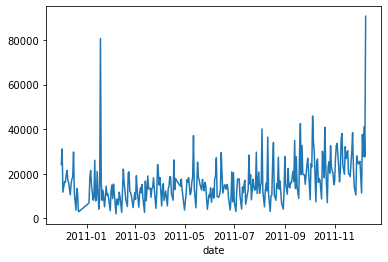

In [11]:
# 일자별 총 거래 수량을 탐색합니다. 
date_quantity_series = df.groupby('date')['Quantity'].sum()
date_quantity_series.plot()

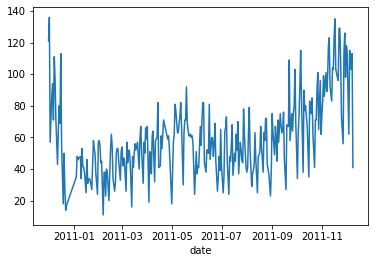

In [12]:
# 일자별 총 거래 횟수를 탐색합니다. 
date_transcation_series = df.groupby('date')['InvoiceNo'].nunique()
date_transcation_series.plot()

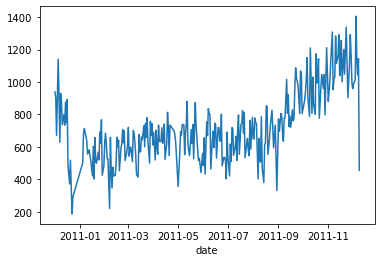

In [13]:
# 일자별 거래된 상품의 unique한 갯수, 즉 상품 거래 다양성을 탐색합니다. 
date_unique_time_series = df.groupby('date')['StockCode'].nunique()
date_unique_time_series.plot()

**유저별 구매 패턴 분석**

In [14]:
# 총 유저의 수를 계산하여 출력합니다. 
print(len(df['CustomerID'].unique()))

4334


In [15]:
# 유저별 거래 횟수를 탐색합니다. 
customer_unique_transaction_series = df.groupby('CustomerID')['InvoiceNo'].nunique()
customer_unique_transaction_series.describe()

count    4334.000000
mean        4.246654
std         7.642535
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       206.000000
Name: InvoiceNo, dtype: float64

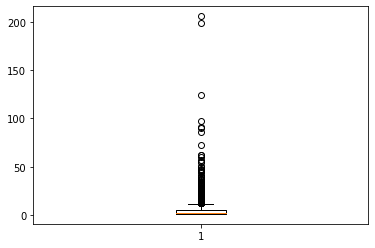

In [16]:
# 상자 그림 시각화로 살펴봅니다. 
plt.boxplot(customer_unique_transaction_series.values)
plt.show()

In [17]:
# 유저별 아이템 구매 종류 개수를 탐색합니다. 
customer_unique_item_series = df.groupby('CustomerID')['StockCode'].nunique()
customer_unique_item_series.describe()

count    4334.000000
mean       61.432856
std        85.312937
min         1.000000
25%        16.000000
50%        35.000000
75%        77.000000
max      1786.000000
Name: StockCode, dtype: float64

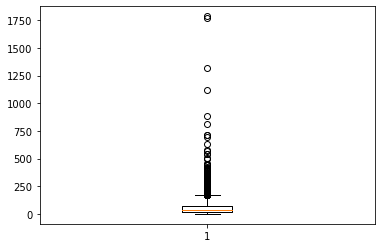

In [18]:
# 상자 그림 시각화로 살펴봅니다. 
plt.boxplot(customer_unique_item_series.values)
plt.show()

### `[미니 퀴즈 - 5.2]`
- `이번에는 유저가 아닌 상품을 기준으로 EDA를 실시해 보세요.` 
    - 아래의 내용들을 탐색적으로 분석해보도록 합시다.
        - 총 상품 갯수
        - 가장 거래가 많은 상품 top 10 탐색
        - 상품별 판매수량 분포 탐색
        - 거래별 가격 탐색

In [19]:
# 총 상품 갯수를 탐색합니다. 
print(len(df['StockCode'].unique()))

3660


In [20]:
# 가장 거래가 많은 상품 top10 탐색
df.groupby('StockCode')['InvoiceNo'].nunique().sort_values(ascending=False)[:10]

StockCode
85123A    1978
22423     1703
85099B    1600
47566     1379
84879     1375
20725     1289
22720     1146
23203     1080
20727     1052
22383     1043
Name: InvoiceNo, dtype: int64

count     3660.000000
mean      1409.149727
std       3513.654056
min          1.000000
25%         65.000000
50%        395.000000
75%       1417.500000
max      80995.000000
Name: Quantity, dtype: float64


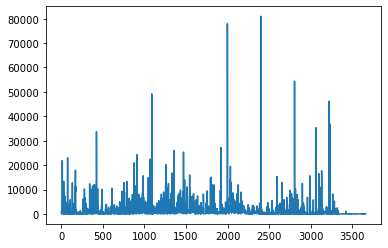

In [21]:
# 상품별 판매수량 분포를 탐색합니다. 
print(df.groupby('StockCode')['Quantity'].sum().describe())
plt.plot(df.groupby('StockCode')['Quantity'].sum().values)
plt.show()

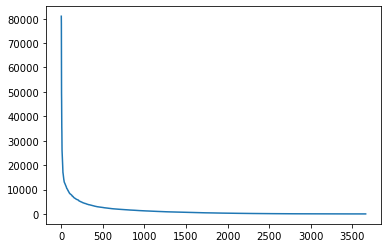

In [22]:
# 분포를 정렬하여 출력합니다. 
plt.plot(df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).values)
plt.show()

In [23]:
# 거래별로 발생한 가격에 대해 탐색합니다. 
df['amount'] = df['Quantity'] * df['UnitPrice']
df.groupby('InvoiceNo')['amount'].sum().describe()

count     18405.000000
mean        476.378845
std        1678.749892
min           0.380000
25%         157.900000
50%         302.360000
75%         465.700000
max      168469.600000
Name: amount, dtype: float64

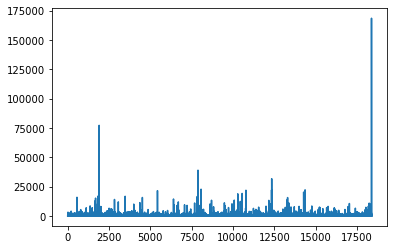

In [24]:
# 거래별로 발생한 가격 분포를 탐색합니다. 
plt.plot(df.groupby('InvoiceNo')['amount'].sum().values)
plt.show()

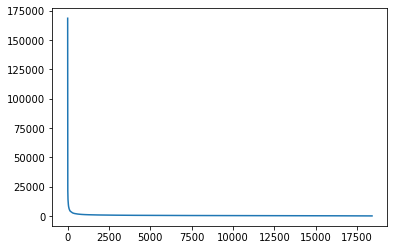

In [25]:
# 분포를 정렬하여 출력합니다. 
plt.plot(df.groupby('InvoiceNo')['amount'].sum().sort_values(ascending=False).values)
plt.show()

**시계열 기준으로 데이터 분리**

In [26]:
import datetime

# 2011년 11월을 기준으로 하여, 기준 이전과 이후로 데이터를 분리합니다.
df_year_round = df[df['date'] < datetime.date(2011,11,1)]
df_year_end = df[df['date'] >= datetime.date(2011,11,1)]
print(df_year_round.shape)
print(df_year_end.shape)


(314902, 11)
(81568, 11)


**분리된 데이터에서 구매 패턴 탐색: 재구매, 신규구매 동의 여부**

In [27]:
# 11월 이전 데이터에서 구매했던 상품의 set을 추출합니다.
customer_item_round_set = df_year_round.groupby('CustomerID')['StockCode'].apply(set)
print(customer_item_round_set)

CustomerID
12346                                              {23166}
12347    {20966, 22134, 22775, 21171, 22561, 21035, 225...
12348    {21981, 84988, 22952, 21726, 21985, 22951, 219...
12350    {22551, 84086C, 22412, 21915, 21866, 21908, 22...
12352    {21731, 22645, 21754, 22646, 22413, 22692, 226...
                               ...                        
18280    {22467, 22358, 22499, 22725, 22084, 22180, 224...
18281    {22467, 22037, 23008, 22028, 22716, 23007, 23209}
18282    {21109, 22424, 23295, 21270, 23187, 22089, 21108}
18283    {23494, 21872, 22645, 21068, 22747, 22553, 229...
18287    {72351B, 22753, 47421, 21556, 21014, 22756, 21...
Name: StockCode, Length: 3970, dtype: object


In [28]:
# 11월 이전에 구매했는지 혹은 이후에 구매했는지를 유저별로 기록하기 위한 사전을 정의합니다.
customer_item_dict = {}

# 11월 이전에 구매한 상품은 'old'라고 표기합니다.
for customer_id, stocks in customer_item_round_set.items():
    customer_item_dict[customer_id] = {}
    for stock_code in stocks:
        customer_item_dict[customer_id][stock_code] = 'old'

print(str(customer_item_dict)[:100] + "...")

{'12346': {'23166': 'old'}, '12347': {'20966': 'old', '22134': 'old', '22775': 'old', '21171': 'old'...


In [29]:
# 11월 이후 데이터에서 구매하는 상품의 set을 추출합니다.
customer_item_end_set = df_year_end.groupby('CustomerID')['StockCode'].apply(set)
print(customer_item_end_set)

CustomerID
12347    {23497, 21731, 23506, 21064, 23271, 84625A, 21...
12349    {23112, 23545, 23494, 23439, 85053, 23273, 223...
12352    {23096, 22978, 23367, 23368, 22627, 22624, 221...
12356                                       {21843, 22423}
12357    {22024, 23494, 21216, 22072, 20931, 23178, 229...
                               ...                        
18272    {22966, 22961, 23494, 72799C, 22076, 22960, 72...
18273                                             {79302M}
18274    {22720, 21231, 84509A, 84988, 22851, 22989, 23...
18282                  {22818, 22699, 23175, 23174, 22423}
18283    {22553, 22952, 21986, 23320, 35970, 20712, 219...
Name: StockCode, Length: 1904, dtype: object


In [30]:
# 11월 이전에만 구매한 상품은 'old', 이후에만 구매한 상품은 'new', 모두 구매한 상품은 'both'라고 표기합니다.

for customer_id, stocks in customer_item_end_set.items():
    # 11월 이전 구매기록이 있는 유저인지를 체크합니다.
    if customer_id in customer_item_dict:
        for stock_code in stocks:
            # 구매한 적 있는 상품인지를 체크한 뒤, 상태를 표기합니다.
            if stock_code in customer_item_dict[customer_id]:
                customer_item_dict[customer_id][stock_code] = 'both'
            else:
                customer_item_dict[customer_id][stock_code] = 'new'
    
    # 11월 이전 구매기록이 없는 유저라면 모두 'new'로 표기합니다.
    else:
        customer_item_dict[customer_id] = {}
        for stock_code in stocks:
            customer_item_dict[customer_id][stock_code] = 'new'

print(str(customer_item_dict)[:100] + "...")

{'12346': {'23166': 'old'}, '12347': {'20966': 'old', '22134': 'old', '22775': 'old', '21171': 'old'...


In [31]:
# 'old', 'new', 'both'를 유저별로 탐색하여 데이터 프레임을 생성합니다.
columns = ['CustomerID', 'old', 'new', 'both']
df_order_info = pd.DataFrame(columns=columns)

# 데이터 프레임을 생성하는 과정입니다.
for customer_id in customer_item_dict:
    old = 0
    new = 0
    both = 0
    
    # 딕셔너리의 상품 상태(old, new, both)를 체크하여 데이터 프레임에 append 할 수 있는 형태로 처리합니다.
    for stock_code in customer_item_dict[customer_id]:
        status = customer_item_dict[customer_id][stock_code]
        if status == 'old':
            old += 1
        elif status == 'new':
            new += 1
        else:
            both += 1
    
    # df_order_info에 데이터를 append합니다.
    row = [customer_id, old, new, both]
    series = pd.Series(row, index=columns)
    df_order_info = df_order_info.append(series, ignore_index=True)

df_order_info.head()

,CustomerID,old,new,both
0,12346,1,0,0
1,12347,92,3,8
2,12348,21,0,0
3,12350,16,0,0
4,12352,43,12,2


In [32]:
# 데이터 프레임에서 전체 유저 수를 출력합니다.
print(df_order_info.shape[0])

# 데이터 프레임에서 old가 1 이상이면서, new가 1 이상인 유저 수를 출력합니다. 
# 11월 이후에 기존에 구매한적 없는 새로운 상품을 구매한 유저를 의미합니다.
print(df_order_info[(df_order_info['old'] > 0) & (df_order_info['new'] > 0)].shape[0])

# 데이터 프레임에서 both가 1 이상인 유저 수를 출력합니다. 
# 재구매한 상품이 있는 유저 수를 의미합니다.
print(df_order_info[df_order_info['both'] > 0].shape[0])

4334
1446
1426


In [33]:
# new피처의 values_counts를 출력하여, 새로운 상품을 얼마나 구매하는지 탐색합니다. 
df_order_info['new'].value_counts()

0      2521
1        81
3        73
2        72
8        65
       ... 
108       1
113       1
115       1
116       1
391       1
Name: new, Length: 133, dtype: int64

In [34]:
# 만약 새로운 상품을 구매한다면, 얼마나 많은 종류의 새로운 상품을 구매하는지 탐색합니다. 
print(df_order_info['new'].value_counts()[1:].describe())

count    132.000000
mean      13.734848
std       19.130672
min        1.000000
25%        1.000000
50%        5.000000
75%       16.000000
max       81.000000
Name: new, dtype: float64


## <step2. 예측분석> : SVD를 활용한 상품 구매 예측
### [피처 엔지니어링]

In [35]:
# 추천 대상 데이터에 포함되는 유저와 상품의 갯수를 출력합니다. 
print(len(df_year_round['CustomerID'].unique()))
print(len(df_year_round['StockCode'].unique()))

3970
3608


**SVD 모델에 사용할 데이타 : User-item 간의 Rating 데이터 생성(U-I-R matrix)**

In [36]:
# Rating 데이터를 생성하기 위한 탐색: 유저 -상품간 구매 횟수를 탐색합니다 
uir_df = df_year_round.groupby(['CustomerID','StockCode'])['InvoiceNo'].nunique().reset_index()
uir_df.head()

,CustomerID,StockCode,InvoiceNo
0,12346,23166,1
1,12347,16008,1
2,12347,17021,1
3,12347,20665,1
4,12347,20719,3


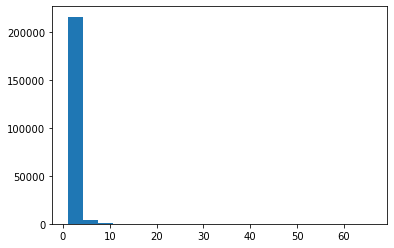

In [37]:
# Rating(InvoiceNo) 피처의 분포를 탐색합니다.
uir_df['InvoiceNo'].hist(bins=20, grid=False)

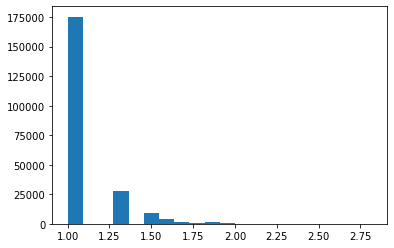

In [38]:
# Rating(InvoiceNo) 피처를 log normalization 해준 뒤, 다시 분포를 탐색합니다. 
uir_df['InvoiceNo'].apply(lambda x: np.log10(x)+1).hist(bins=20, grid=False)

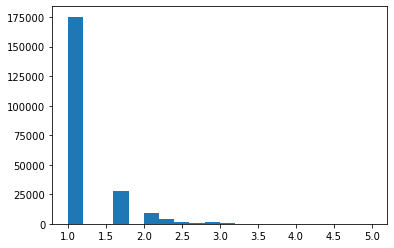

In [39]:
# 1~5 사이의 점수로 변환합니다. 
uir_df['Rating'] = uir_df['InvoiceNo'].apply(lambda x:np.log10(x) + 1)
uir_df['Rating'] = ((uir_df['Rating'] - uir_df["Rating"].min())/
                   (uir_df["Rating"].max() - uir_df["Rating"].min())*4) +1
uir_df['Rating'].hist(bins=20, grid=False)

### [SVD 모델 학습하기]

In [40]:
# SVD모델 학습을 위한 데이터셋을 생성합니다.
uir_df = uir_df[['CustomerID',"StockCode",'Rating']]
uir_df.head()

,CustomerID,StockCode,Rating
0,12346,23166,1.000000
1,12347,16008,1.000000
2,12347,17021,1.000000
3,12347,20665,1.000000
4,12347,20719,2.048881


In [41]:
import time
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

# SVD 라이브러리를 사용하기 위한 학습데이터 생성합니다. 대략적인 성능을 알아보기 위해 학습데이터와 테스트데이터를 8:2 로 분리합니다. 
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(uir_df[['CustomerID', 'StockCode','Rating']], reader)
train_data, test_data = train_test_split(data, test_size=0.2)

# SVD 모델을 학습합니다. 
train_start = time.time()
model =SVD(n_factors=8,
          lr_all=0.005,
          reg_all=0.02,
          n_epochs = 200)

model.fit(train_data)
train_end = time.time()
print('training time id model: %.2f seconds' % (train_end - train_start))

predictions = model.test(test_data)

# 테스트 데이터의 RMSE를 출력하여 모델의 성능을 평가합니다. 
print('RMSE of test dataset in SVD model: ')
accuracy.rmse(predictions)

training time id model: 41.67 seconds
RMSE of test dataset in SVD model: 
RMSE: 0.3332


0.3331957473034189

In [42]:
# SVD 라이브러리를 사용하기 위한 학습데이터를 생성합니다. 11월 이전 전체를 full trainset으로 활용합니다. 
reader =Reader(rating_scale=(1,5))
data = Dataset.load_from_df(uir_df[['CustomerID', 'StockCode','Rating']], reader)
train_data = data.build_full_trainset()

# SVD 모델을 학습합니다. 
train_start = time.time()
model = SVD(n_factors=8,
           lr_all=0.005,
           reg_all=0.02,
           n_epochs=200)
    
model.fit(train_data)
train_end = time.time()
print('training time f model: %.2f seconds' % (train_end - train_start))

training time f model: 50.24 seconds


## <step3. 에측평가하기> : 상품추천 시뮬레이션
### [상품추천 시뮬레이션

In [66]:
"""
11월 이전 데이터에서 유저-상품에 대한 Rating을 기반으로 추천 상품을 선정합니다.

1. 이전에 구매하지 않았던 상품 추천 : anti_build_testset()을 사용합니다.
2. 이전에 구매했던 상품 다시 추천 : build_testset()을 사용합니다.
3. 모든 상품을 대상으로 하여 상품 추천
"""

# 이전에 구매하지 않았던 상품을 예측의 대상으로 선정합니다.
test_data = train_data.build_anti_testset()
target_user_predictions = model.test(test_data)

# 구매 예측 결과를 딕셔너리 형태로 변환합니다.
new_order_prediction_dict = {}
for customer_id, stock_code, _, predicted_rating, _ in target_user_predictions:
    if customer_id in new_order_prediction_dict:
        if stock_code in new_order_prediction_dict[customer_id]:
            pass
        else:
            new_order_prediction_dict[customer_id][stock_code] = predicted_rating
    else:
        new_order_prediction_dict[customer_id] = {}
        new_order_prediction_dict[customer_id][stock_code] = predicted_rating

print(str(new_order_prediction_dict)[:300] + "...")

{'12346': {'16008': 1, '17021': 1.1669446285397278, '20665': 1.0912671498553455, '20719': 1.1858708589842606, '20780': 1.0509460676896307, '20782': 1.1788005154421972, '20966': 1.025470840756913, '21035': 1.0630659837197298, '21041': 1.0627116084036285, '21064': 1.1456448228082659, '21154': 1.105965...


In [67]:
# 이전에 구매했었던 상품을 예측의 대상으로 선정합니다.
test_data = train_data.build_testset()
target_user_predictions = model.test(test_data)

# 구매 예측 결과를 딕셔너리 형태로 변환합니다.
reorder_prediction_dict = {}
for customer_id, stock_code, _, predicted_rating, _ in target_user_predictions:
    if customer_id in reorder_prediction_dict:
        if stock_code in reorder_prediction_dict[customer_id]:
            pass
        else:
            reorder_prediction_dict[customer_id][stock_code] = predicted_rating
    else:
        reorder_prediction_dict[customer_id] = {}
        reorder_prediction_dict[customer_id][stock_code] = predicted_rating
        
print(str(reorder_prediction_dict)[:300] + "...")

{'12346': {'23166': 1.0471723533094799}, '12347': {'16008': 1.1774798143645644, '17021': 1.3770381552741144, '20665': 1.2502434732180334, '20719': 1.8564234878630068, '20780': 1.2985732329924398, '20782': 1.3341696400176688, '20966': 1.2974339081127189, '21035': 1.478183777998127, '21041': 1.3394364...


In [68]:
# 두 딕셔너리를 하나로 통합합니다.
total_prediction_dict = {}

# new_order_prediction_dict 정보를 새로운 딕셔너리에 저장합니다.
for customer_id in new_order_prediction_dict:
    if customer_id not in total_prediction_dict:
        total_prediction_dict[customer_id] = {}
    for stock_code, predicted_rating in new_order_prediction_dict[customer_id].items():
        if stock_code not in total_prediction_dict[customer_id]:
            total_prediction_dict[customer_id][stock_code] = predicted_rating
            
# reorder_prediction_dict 정보를 새로운 딕셔너리에 저장합니다.
for customer_id in reorder_prediction_dict:
    if customer_id not in total_prediction_dict:
        total_prediction_dict[customer_id] = {}
    for stock_code, predicted_rating in reorder_prediction_dict[customer_id].items():
        if stock_code not in total_prediction_dict[customer_id]:
            total_prediction_dict[customer_id][stock_code] = predicted_rating
            
print(str(total_prediction_dict)[:300] + "...")

{'12346': {'16008': 1, '17021': 1.1669446285397278, '20665': 1.0912671498553455, '20719': 1.1858708589842606, '20780': 1.0509460676896307, '20782': 1.1788005154421972, '20966': 1.025470840756913, '21035': 1.0630659837197298, '21041': 1.0627116084036285, '21064': 1.1456448228082659, '21154': 1.105965...


In [69]:
# 11월 이후의 데이터를 데이터셋으로 사용하기 위한 데이터 프레임을 생성
simulation_test_df = df_year_end.groupby('CustomerID')['StockCode'].apply(set).reset_index()
simulation_test_df.columns = ['CustomerID','RealOrdered']
simulation_test_df.head()

,CustomerID,RealOrdered
0,12347,"{23497, 21731, 23506, 21064, 23271, 84625A, 21..."
1,12349,"{23112, 23545, 23494, 23439, 85053, 23273, 223..."
2,12352,"{23096, 22978, 23367, 23368, 22627, 22624, 221..."
3,12356,"{21843, 22423}"
4,12357,"{22024, 23494, 21216, 22072, 20931, 23178, 229..."


In [70]:
# 이 데이터프레임에 상품 추천 시뮬레이션 결과를 추가하기 위한 함수를 정의합니다.
def add_predicted_stock_set(customer_id, prediction_dict):
    if customer_id in prediction_dict:
        predicted_stock_dict = prediction_dict[customer_id]
        # 예측된 상품의 Rating이 높은 순으로 정렬합니다.
        sorted_stocks = sorted(predicted_stock_dict, key=lambda x : predicted_stock_dict[x], reverse=True)
        return sorted_stocks
    else:
        return None

# 상품 추천 시뮬레이션 결과를 추가합니다.
simulation_test_df['PredictedOrder(New)'] = simulation_test_df['CustomerID']. \
                                            apply(lambda x: add_predicted_stock_set(x, new_order_prediction_dict))
simulation_test_df['PredictedOrder(Reorder)'] = simulation_test_df['CustomerID']. \
                                            apply(lambda x: add_predicted_stock_set(x, reorder_prediction_dict))
simulation_test_df['PredictedOrder(Total)'] = simulation_test_df['CustomerID']. \
                                            apply(lambda x: add_predicted_stock_set(x, total_prediction_dict))
simulation_test_df.head()

,CustomerID,RealOrdered,PredictedOrder(New),PredictedOrder(Reorder),PredictedOrder(Total)
0,12347,"{23497, 21731, 23506, 21064, 23271, 84625A, 21...","[85123A, 22197, 20727, 22326, 20725, 22328, 20...","[22726, 22728, 22727, 22423, 22725, 21731, 227...","[85123A, 22197, 22726, 20727, 22326, 20725, 22..."
1,12349,"{23112, 23545, 23494, 23439, 85053, 23273, 223...",None,None,None
2,12352,"{23096, 22978, 23367, 23368, 22627, 22624, 221...","[90119, 85131B, 84086B, 90042A, 72709, 90035A,...","[37448, 22779, 22993, 21232, 84050, 22138, 224...","[90119, 85131B, 84086B, 90042A, 72709, 90035A,..."
3,12356,"{21843, 22423}","[84086B, 90119, 85131B, 90035A, 21034, 90042A,...","[37450, 21843, 22423, 22649, 22699, 22698, 215...","[84086B, 90119, 85131B, 90035A, 21034, 90042A,..."
4,12357,"{22024, 23494, 21216, 22072, 20931, 23178, 229...",None,None,None


### [상품추천 평가하기]
**평가 기준 정의하기**

In [71]:
# 구매 예측의 상위 k개의 recall(재현율)을 평가 기준으로 정의합니다.
def calculate_recall(real_order, predicted_order, k):
    # 만약 추천 대상 상품이 없다면, 11월 이후에 상품을 처음 구매하는 유저입니다.
    if predicted_order is None:
        return None
    
    # SVD 모델에서 현재 유저의 Rating이 높은 상위 k개의 상품을 "구매 할 것으로 예측"합니다.
    predicted = predicted_order[:k]
    true_positive = 0
    for stock_code in predicted:
        if stock_code in real_order:
            true_positive += 1
    
    # 예측한 상품 중, 실제로 유저가 구매한 상품의 비율(recall)을 계산합니다.
    recall = true_positive / len(predicted)
    return recall

# 시뮬레이션 대상 유저에게 상품을 추천해준 결과를 평가합니다.
simulation_test_df['top_k_recall(Reorder)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(Reorder)'], 
                                                                                 5), axis=1)
simulation_test_df['top_k_recall(New)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(New)'], 
                                                                                 5), axis=1)
simulation_test_df['top_k_recall(Total)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(Total)'], 
                                                                                 5), axis=1)

In [73]:
# 평가 결과를 유저 평균으로 살펴봅니다.
print(simulation_test_df['top_k_recall(Reorder)'].mean())
print(simulation_test_df['top_k_recall(New)'].mean())
print(simulation_test_df['top_k_recall(Total)'].mean())

0.31607142857142667
0.005974025974025974
0.07324675324675353


In [74]:
# 평가 결과를 점수 기준으로 살펴봅니다. 
simulation_test_df['top_k_recall(Reorder)'].value_counts()

0.000000    477
0.200000    359
0.400000    307
0.600000    167
0.800000    139
1.000000     72
0.500000      7
0.250000      6
0.666667      4
0.333333      1
0.750000      1
Name: top_k_recall(Reorder), dtype: int64

In [75]:
# 평가 결과를 점수 기준으로 살펴봅닏. 
simulation_test_df['top_k_recall(New)'].value_counts()

0.0    1496
0.2      42
0.4       2
Name: top_k_recall(New), dtype: int64

In [76]:
# 평가 결과를 점수 기준으로 살펴봅니다. 
simulation_test_df['top_k_recall(Total)'].value_countscounts()

0.0    1213
0.2     185
0.4      82
0.6      32
0.8      21
1.0       7
Name: top_k_recall(Total), dtype: int64

In [79]:
# SVD 모델의 추천기준에 부합하지 않는 유저를 추출합니다.
not_recommended_df = simulation_test_df[simulation_test_df['PredictedOrder(Reorder)'].isnull()]
print(not_recommended_df.shape)
not_recommended_df.head()

(364, 8)


,CustomerID,RealOrdered,PredictedOrder(New),PredictedOrder(Reorder),PredictedOrder(Total),top_k_recall(Reorder),top_k_recall(New),top_k_recall(Total)
1,12349,"{23112, 23545, 23494, 23439, 85053, 23273, 223...",None,None,None,NaN,NaN,NaN
4,12357,"{22024, 23494, 21216, 22072, 20931, 23178, 229...",None,None,None,NaN,NaN,NaN
8,12367,"{16237, 22631, 22629, 21770, 22630, 22708, 220...",None,None,None,NaN,NaN,NaN
9,12374,"{21485, 46775D, 21788, 22441, 23320, 22113, 22...",None,None,None,NaN,NaN,NaN
15,12391,"{22208, 23159, 22586, 23516, 23048, 23128, 211...",None,None,None,NaN,NaN,NaN


**시뮬레이션 결과보기**

In [80]:
# 추천 시뮬레이션 결과를 살펴봅니다. 
k = 5
result_df = simulation_test_df[simulation_test_df['PredictedOrder(Reorder)'].notnull()]
result_df['PredictedOrder(Reorder)'] = result_df['PredictedOrder(Reorder)'].\
                                        apply(lambda x: x[:k])
result_df = result_df[['CustomerID', 'RealOrdered',
                      'PredictedOrder(Reorder)', 'top_k_recall(Reorder)']]
result_df.columns = [['구매자ID','실제주문','5개추천결과','TOP추천_주문재현도']]
result_df.sample(5).head()

,구매자ID,실제주문,5개추천결과,TOP추천_주문재현도
357,13418,"{23497, 23545, 22726, 22725, 22818, 23535, 228...","[22726, 22727, 22730, 22728, 22729]",0.6
1888,18229,"{85048, 22662, 22960, 22727, 22384, 22845, 227...","[22383, 20725, 22727, 20726, 22192]",0.6
890,15081,"{84970S, 23486, 85123A, 85048, 90019A, 90175C}","[85123A, 23321, 22487, 85231B, 23144]",0.2
1339,16592,"{23439, 22111, 21485, 23332, 22577, 23351, 229...","[22197, 20725, 21080, 20914, 15036]",0.2
589,14173,"{23439, 21034, 23077, 23083, 23084, 22633}","[75049L, 85123A, 21592, 22906, 22845]",0.0
